# Rede InceptionV3 com pesos ImageNet

Este notebook carrega a rede InceptionV3 (derivada da GogLenet) com os pesos treinados da rede vencedora da ImageNet.

- A rede InceptionV3 é criada e carregada com os pesos da ImageNet
- Uma imagem é preparada para fazer a predição
- A predição de uma imagem
- Mostra a classe da imagem de acordo com a classificação da ImageNet

A rede InceptionV3 é baseada na rede Inception (GoogLeNet).

Como forma de comparação:

 - AlexNet conseguiu uma taxa de erro de 15.3% nos dados de 2012 da ImageNet;
 - Inception (GoogLeNet) obteve 6.67%; 
 - BN-Inception-v2 obteve 4.9%; 
 - Inception-v3 conseguiu 3.46% de taxa de erro nos dados de 2012 da ImageNet.

<img src='../figures/GoogLenet.png',width=600pt></img>

O código de criação da rede pode ser visto em:

- [https://github.com/fchollet/deep-learning-models](https://github.com/fchollet/deep-learning-models)

In [13]:
import keras
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
K.set_image_data_format("channels_last")

In [14]:
from keras.utils.data_utils import get_file

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results

def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x


In [15]:
model = InceptionV3(weights='imagenet')

print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_95 (Conv2D)               (None, 149, 149, 32)  864                                          
____________________________________________________________________________________________________
batch_normalization_95 (BatchNor (None, 149, 149, 32)  96                                           
____________________________________________________________________________________________________
activation_95 (Activation)       (None, 149, 149, 32)  0                                            
___________________________________________________________________________________________

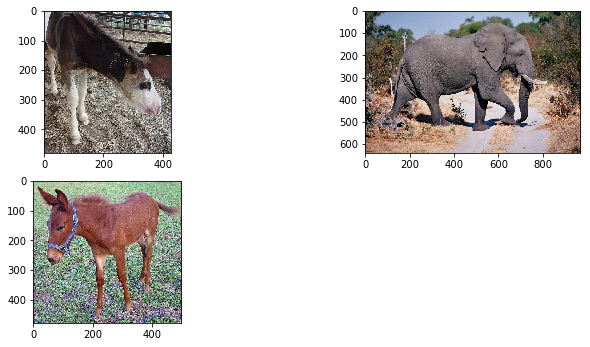

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from keras.preprocessing import image
#from imagenet_utils import preprocess_input, decode_predictions
img_list = ['../data/horse.jpg','../data/Moremi_elephant.jpg','../data/mula.jpg']

plt.figure(figsize=(12, 12))
xlist = []
for k,img_path in enumerate(img_list):
    f = mpimg.imread(img_path)
    plt.subplot(4,2, k + 1)
    plt.imshow(f)
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    #x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    xlist.append(x)


In [20]:
X = np.array(xlist)
print(X.shape)
preds = model.predict(X)
print(preds.shape)

(3, 299, 299, 3)
(3, 1000)


In [30]:
predicted = decode_predictions(preds)
for i in predicted:
    print(i[0][1],int(i[0][2]*100),'%')
    print()
    

Arabian_camel 23 %

Indian_elephant 56 %

sorrel 96 %

